In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")


In [4]:
df2 = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

In [5]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [10]:
df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [11]:
df.duplicated().sum()

0

# No Null or DUPLICATED Values 

In [8]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [9]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [12]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

In [11]:
category

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status
0,D-penicillamine,M,N,N,N,N,3.0,D
1,Placebo,F,N,N,N,N,3.0,C
2,Placebo,F,N,Y,Y,Y,4.0,D
3,Placebo,F,N,N,N,N,3.0,C
4,Placebo,F,N,Y,N,N,4.0,C
...,...,...,...,...,...,...,...,...
7900,D-penicillamine,F,N,N,N,N,2.0,C
7901,Placebo,F,N,Y,N,N,4.0,C
7902,D-penicillamine,F,N,N,Y,S,2.0,D
7903,D-penicillamine,M,N,Y,N,N,4.0,D


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

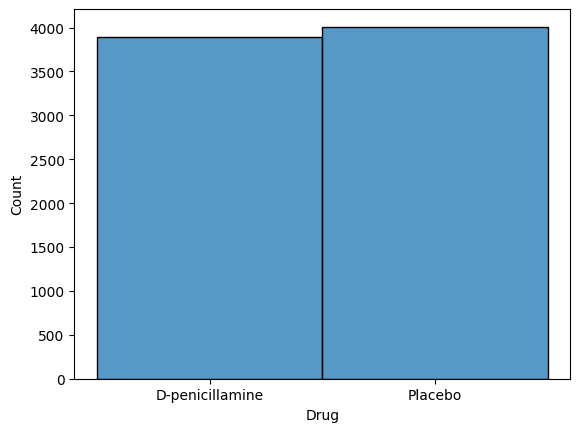

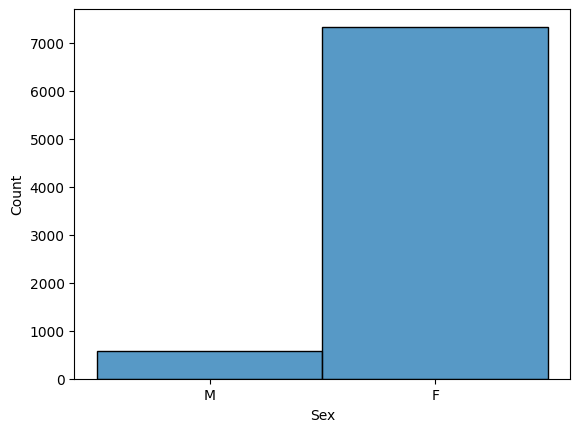

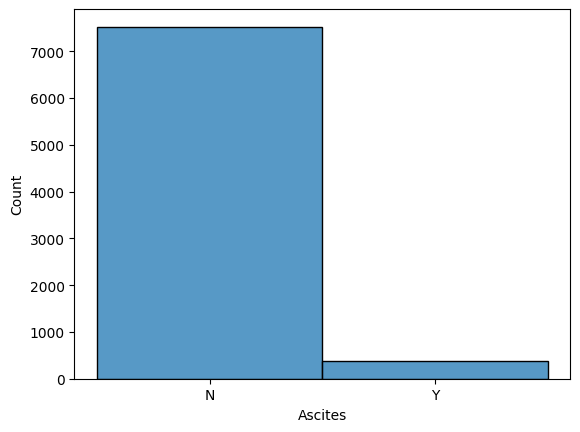

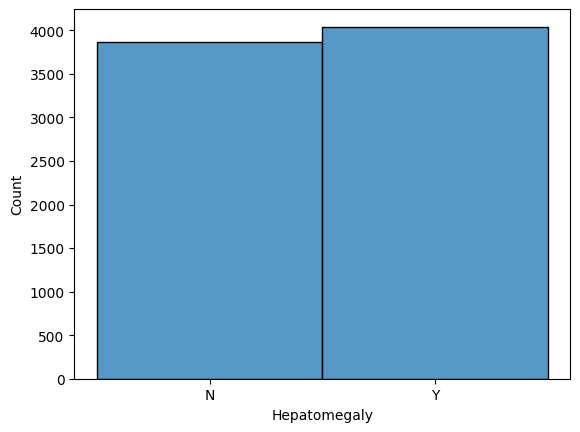

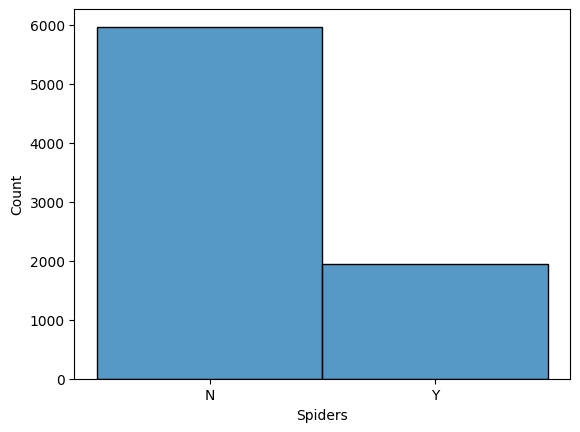

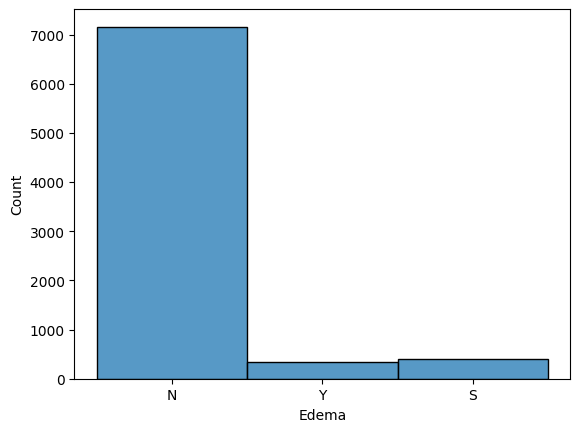

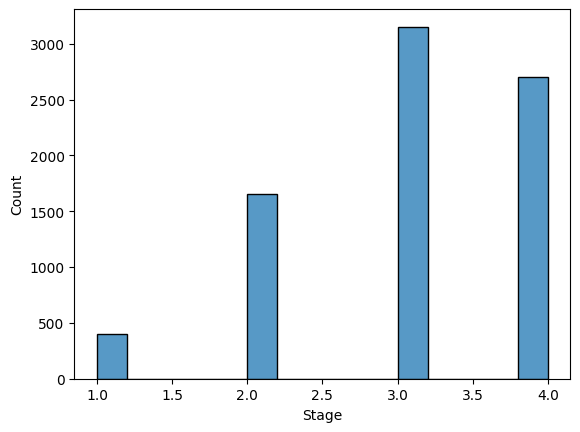

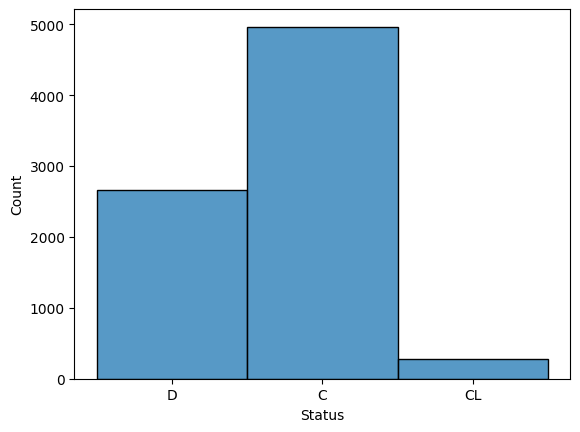

In [13]:
for i in category.columns:
    sns.histplot(data=category,x=i)
    plt.show()

In [12]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

In [12]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

In [12]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

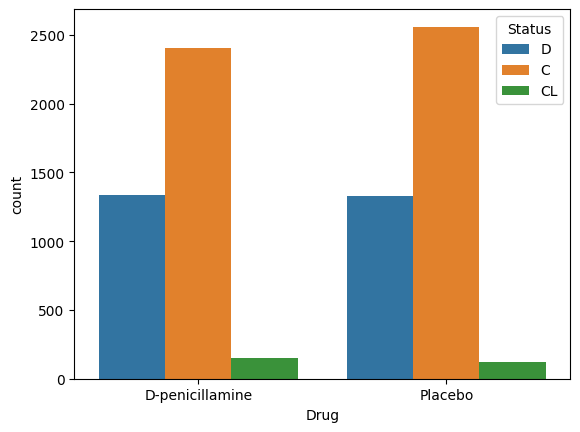

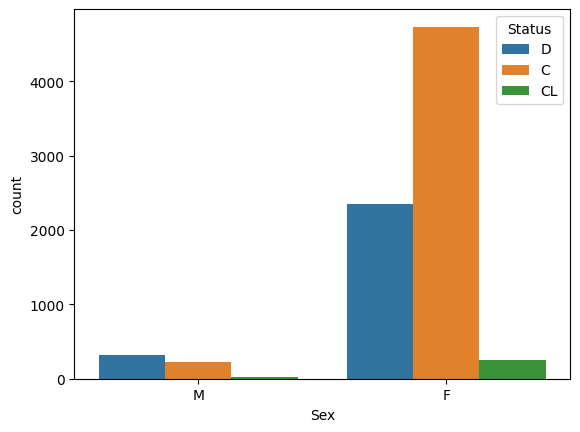

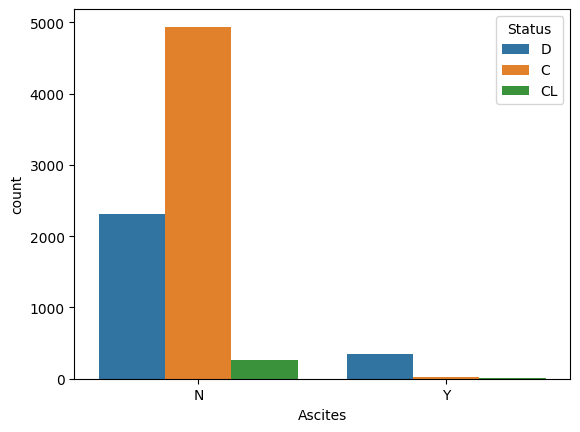

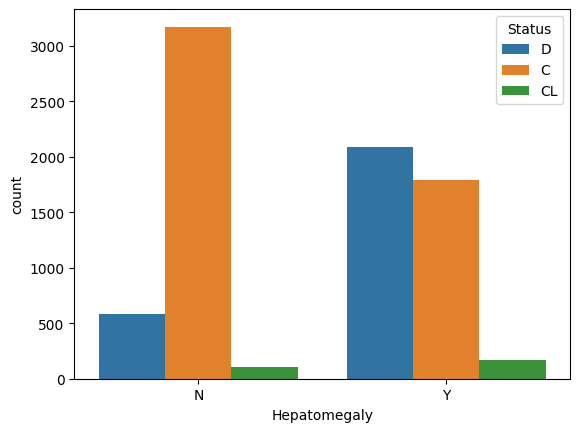

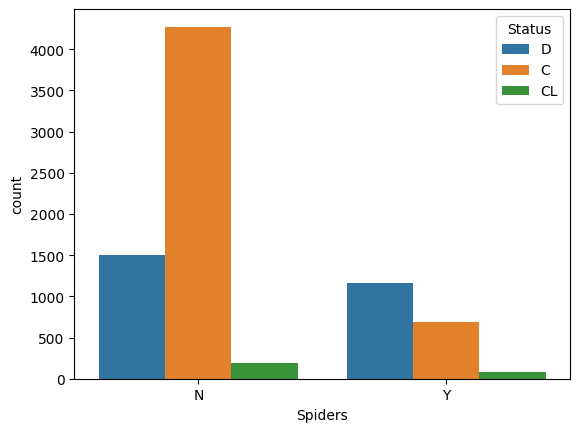

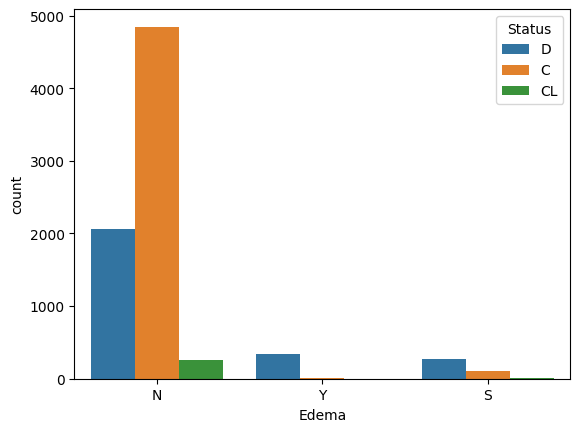

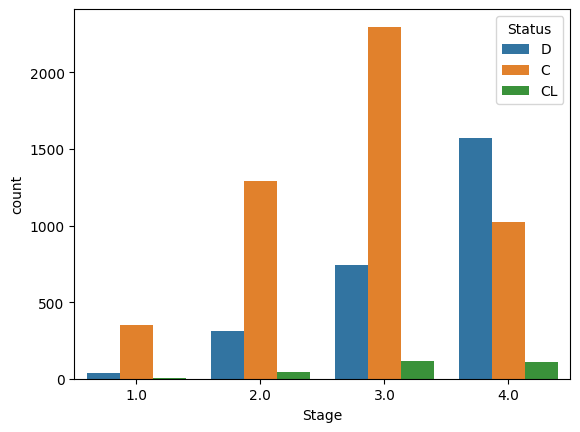

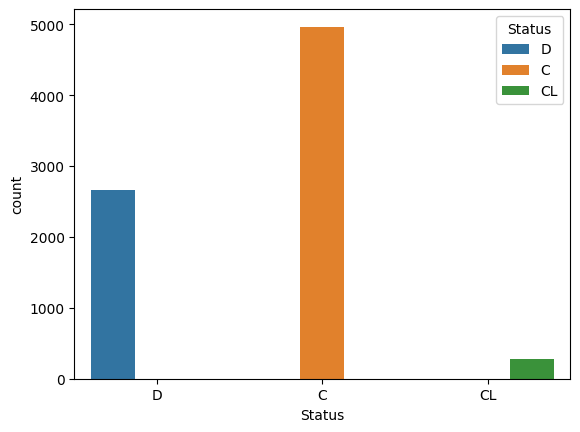

In [14]:
for i in category.columns:
    sns.countplot(data=category,x=i,hue='Status')
    plt.show()

In [15]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

<Axes: ylabel='count'>

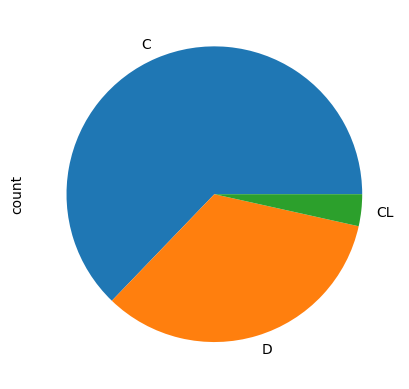

In [17]:
df['Status'].value_counts().plot.pie()

In [14]:
categorical_features = df.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features)

Categorical features:  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical_features:
    df[i] = encoder.fit_transform(df[i])

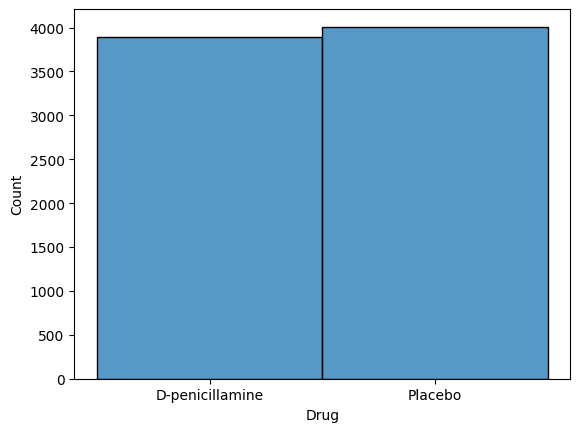

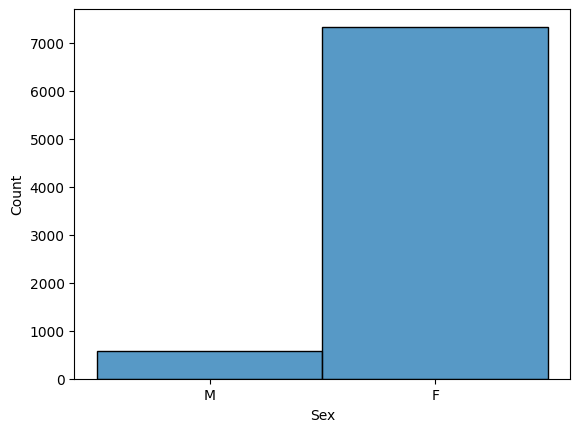

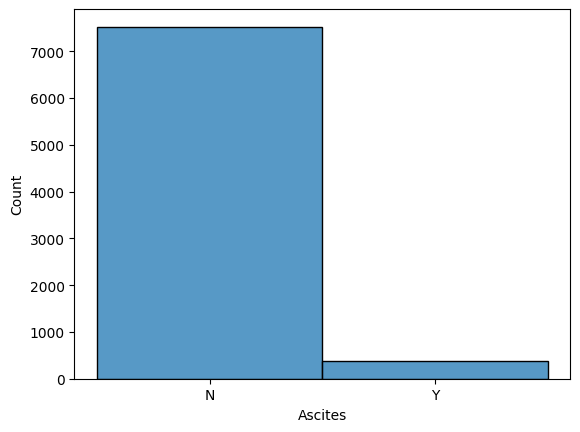

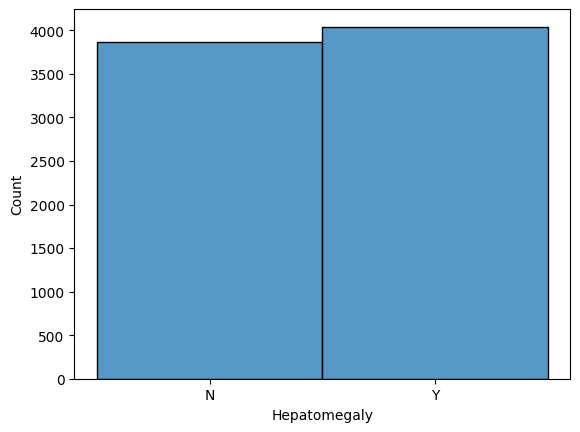

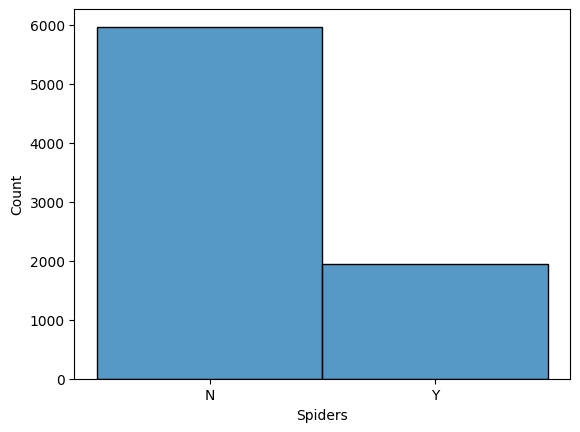

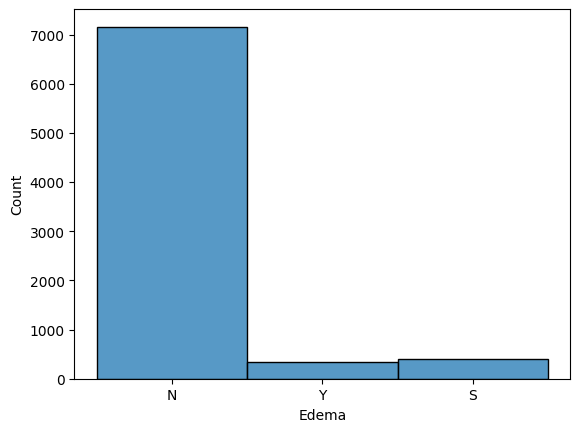

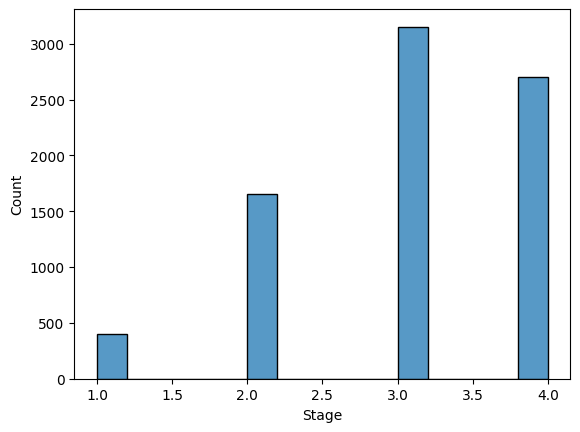

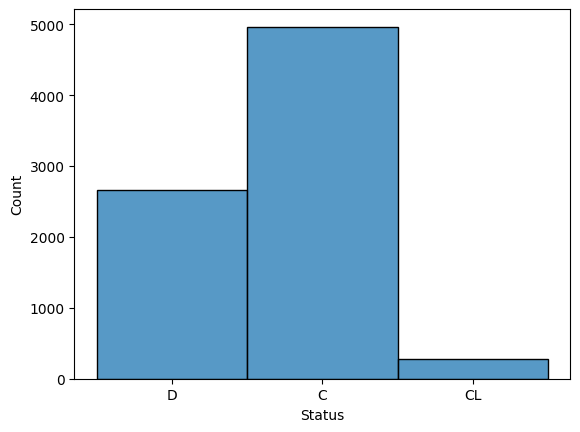

In [13]:
for i in category.columns:
    sns.histplot(data=category,x=i)
    plt.show()

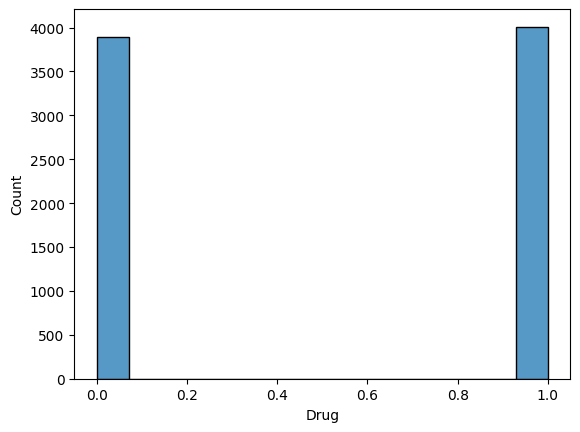

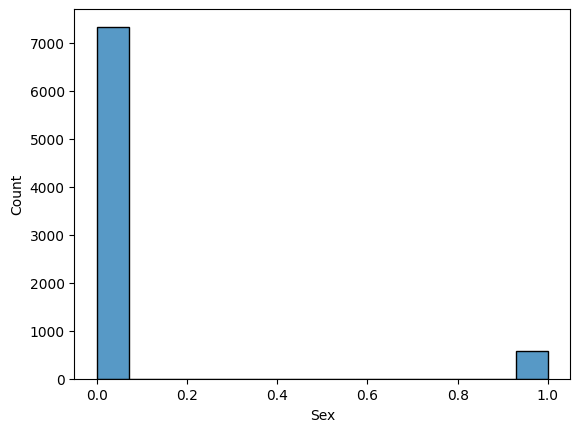

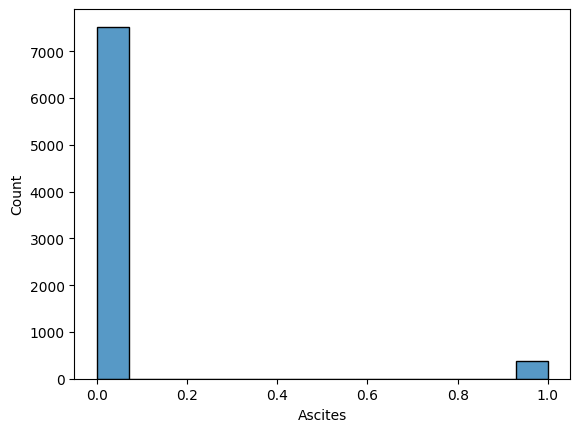

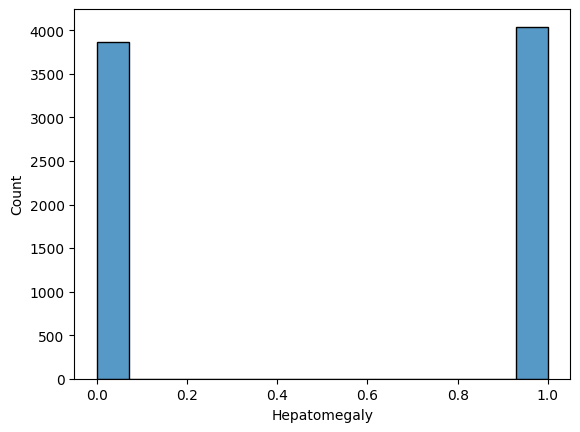

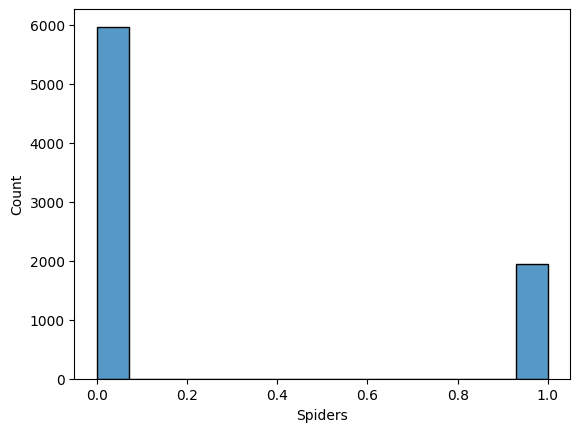

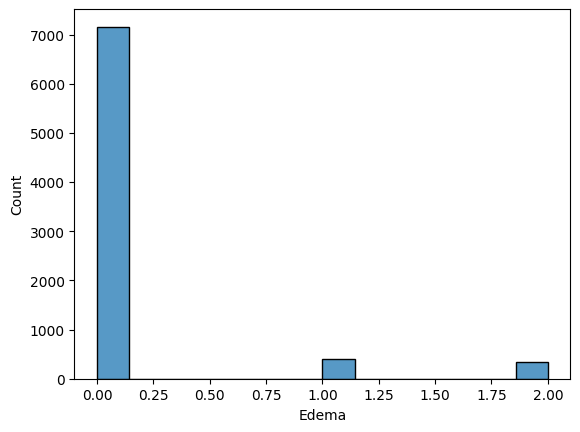

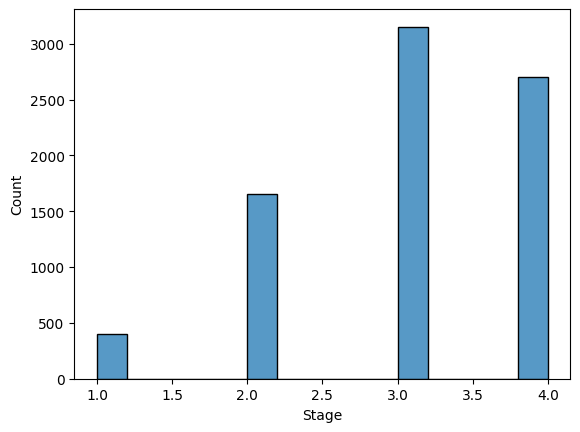

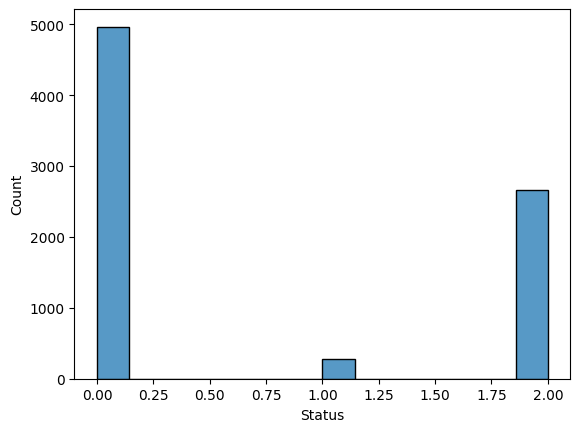

In [17]:
for i in category.columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   int64  
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   int64  
 5   Ascites        7905 non-null   int64  
 6   Hepatomegaly   7905 non-null   int64  
 7   Spiders        7905 non-null   int64  
 8   Edema          7905 non-null   int64  
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [22]:
sns.set(font_scale=3)

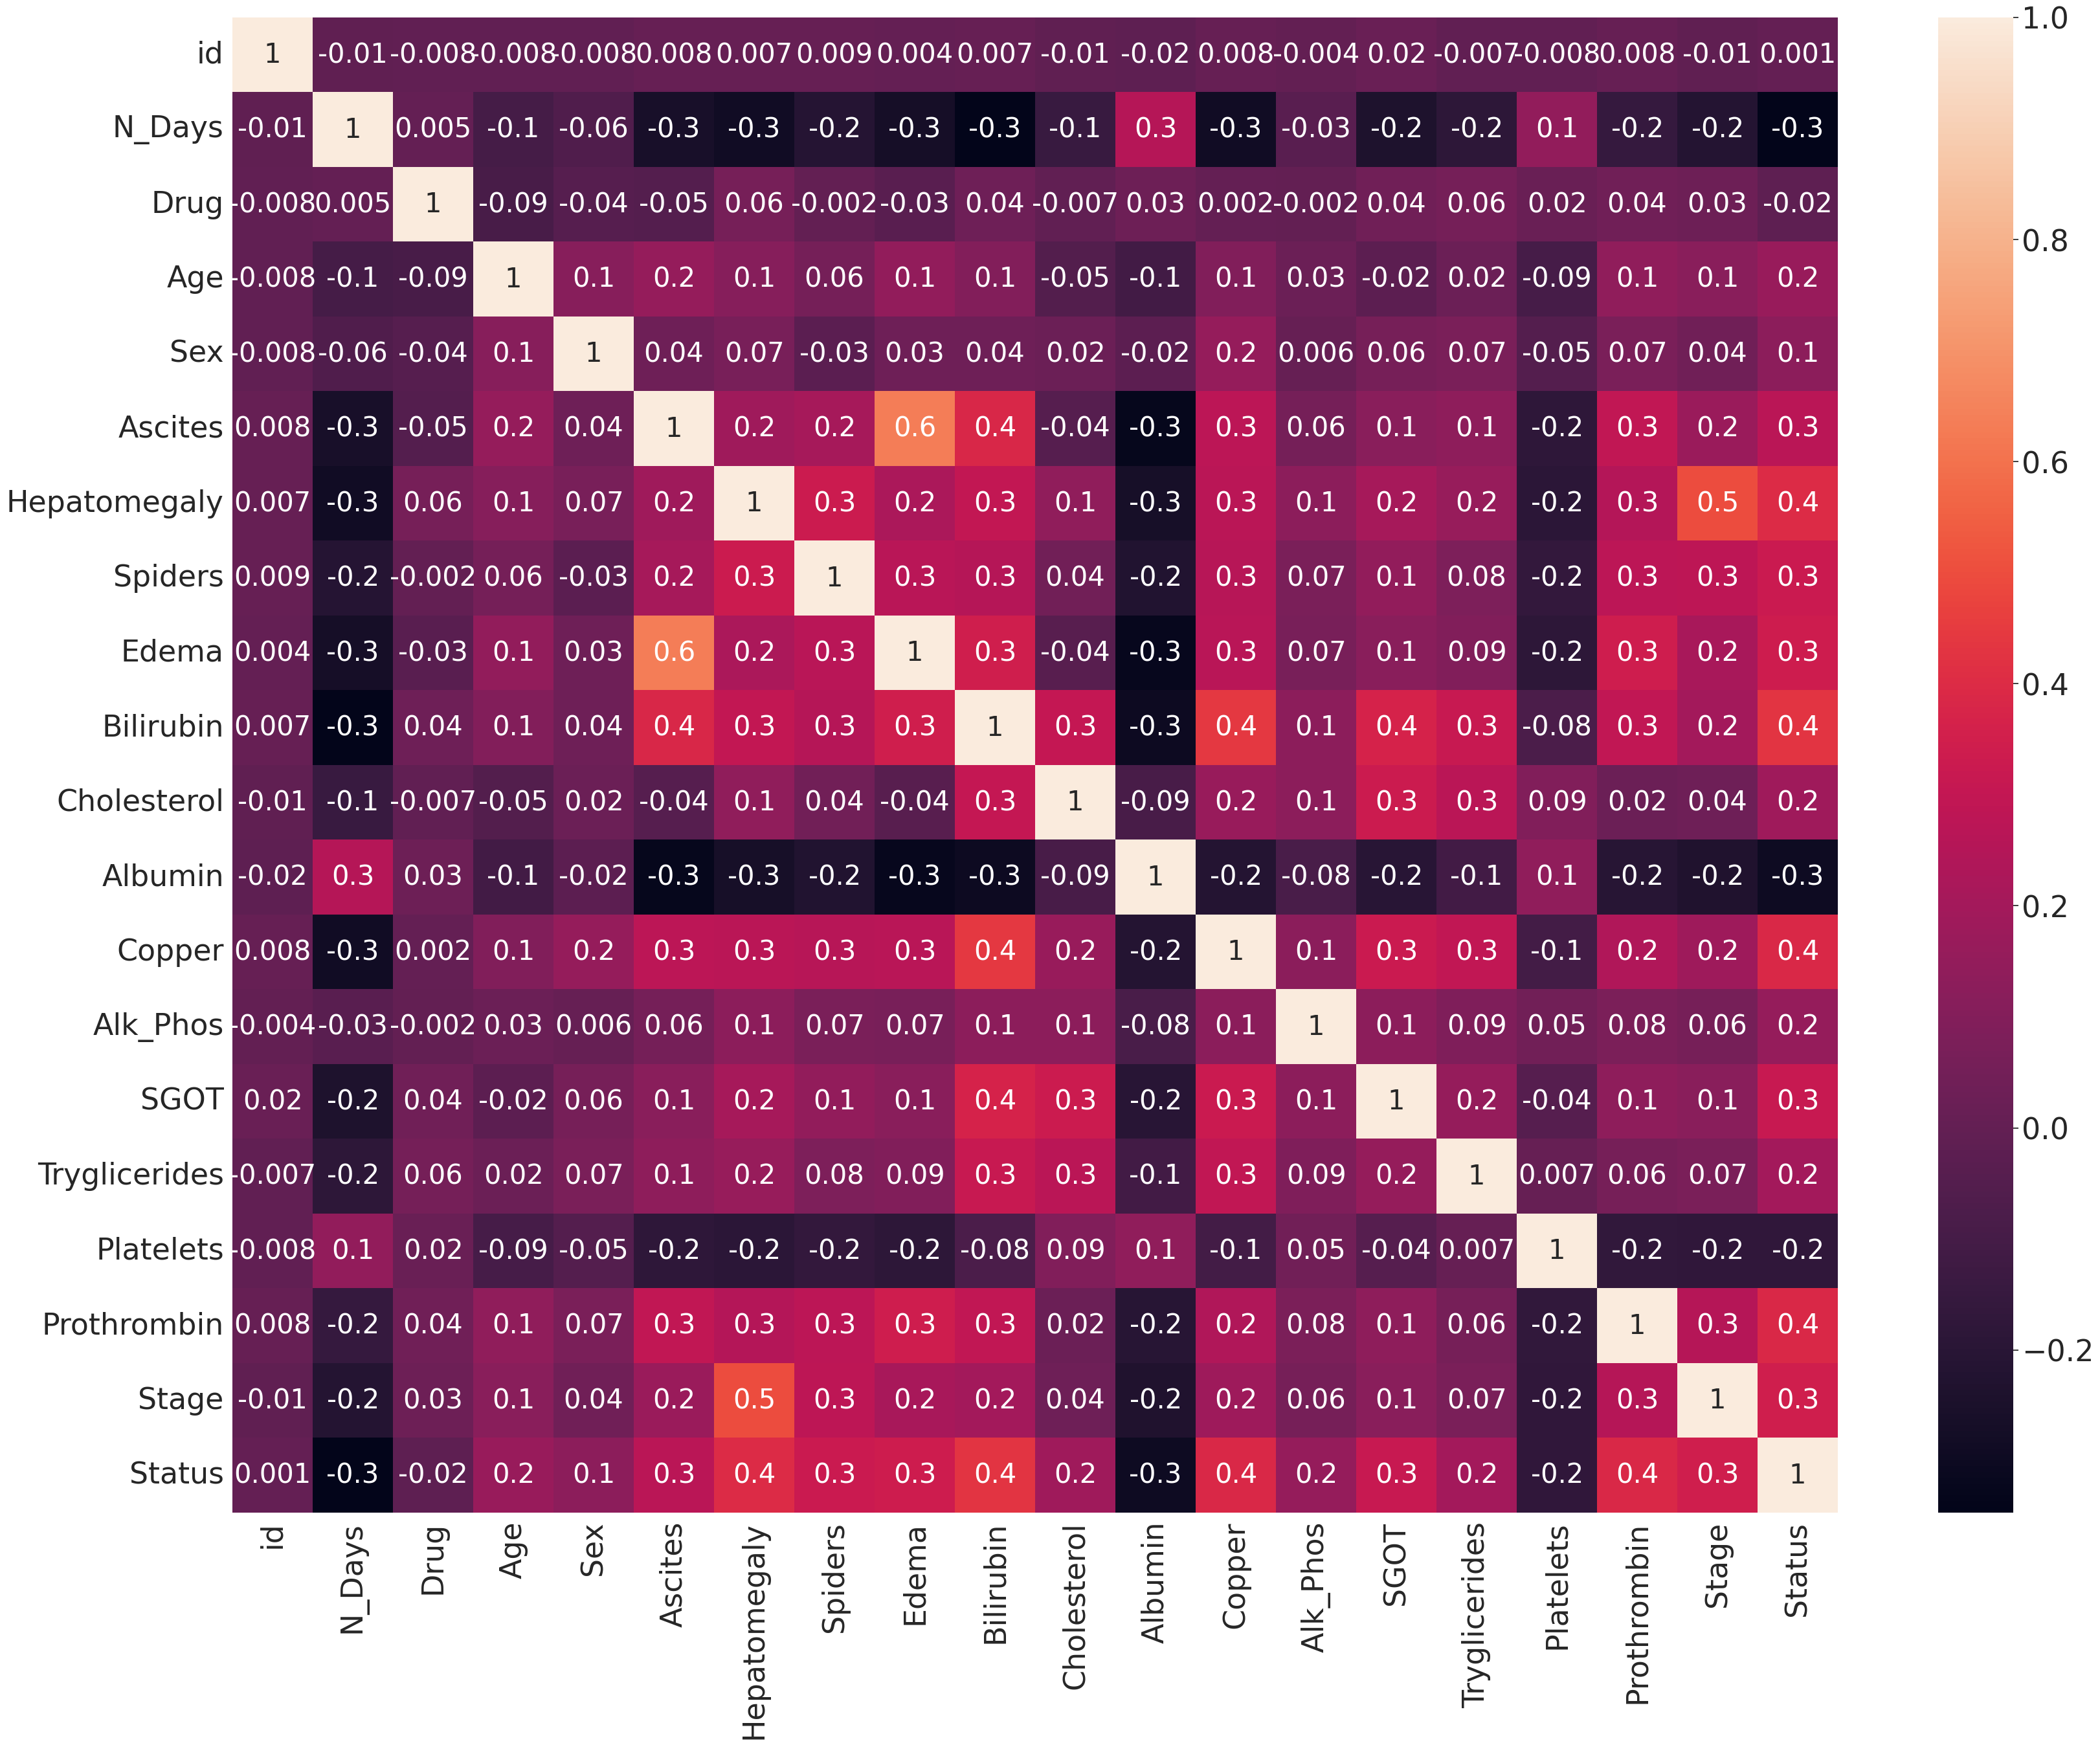

In [23]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=3)

In [24]:
# id is not contributing as shown in above heatmat
df = df.drop('id',axis=1)

In [25]:
sns.set(font_scale=1)

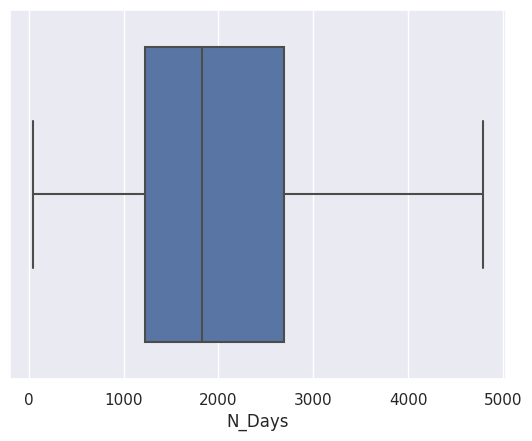

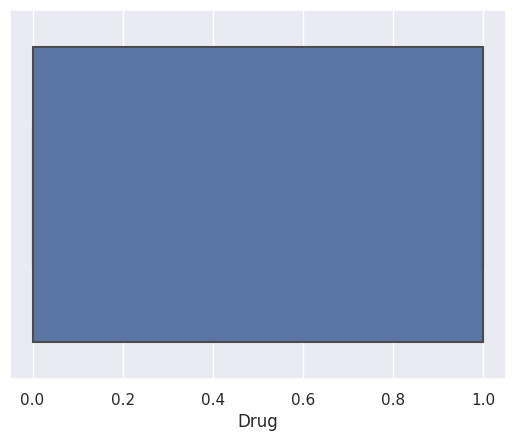

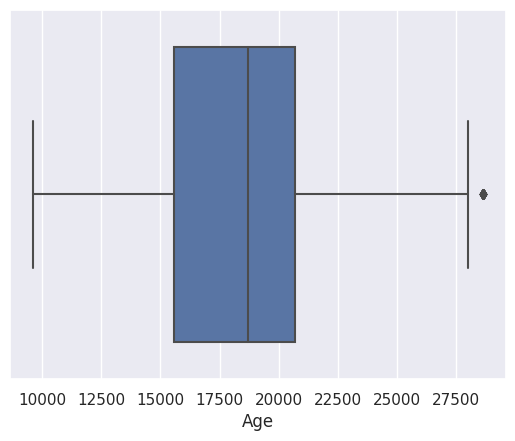

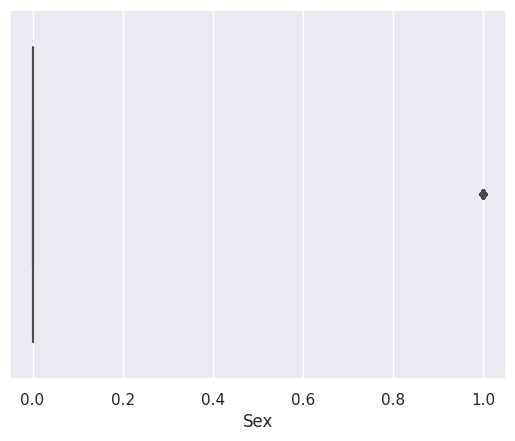

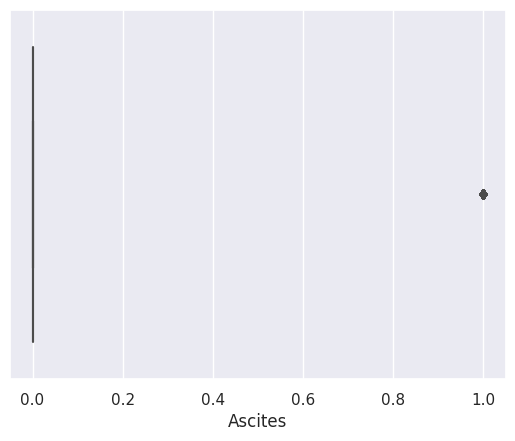

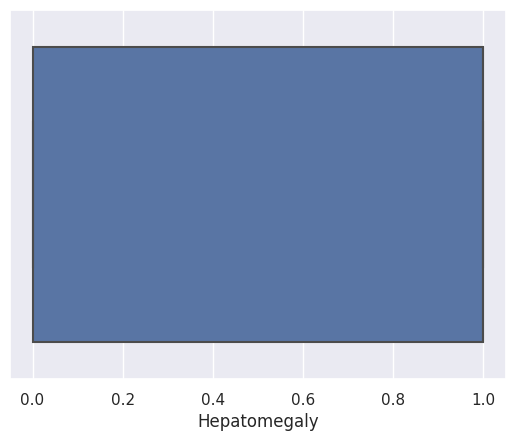

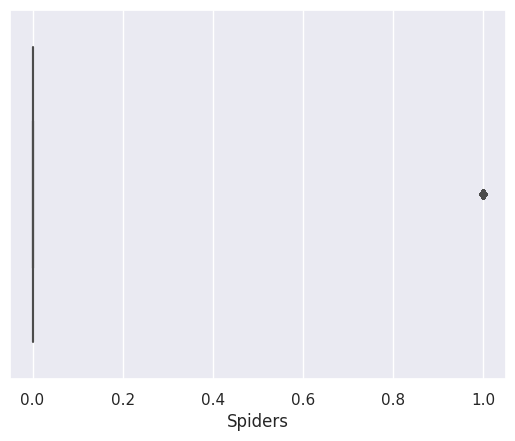

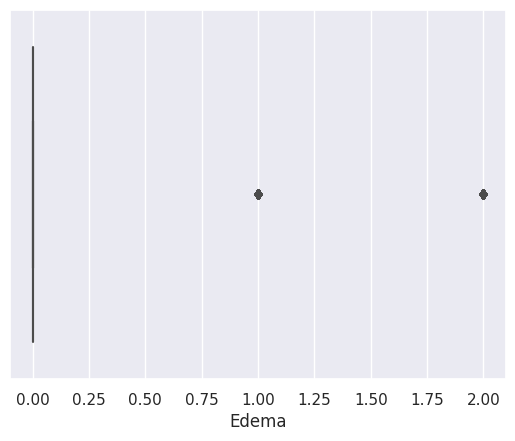

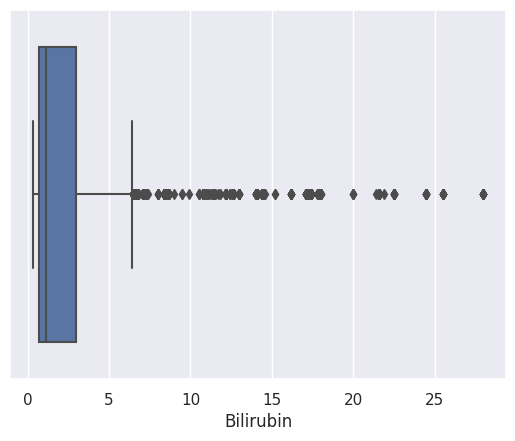

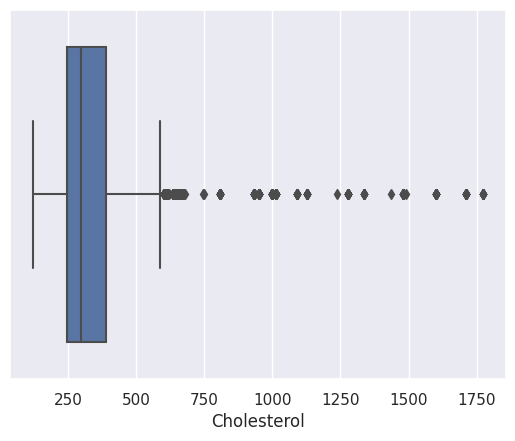

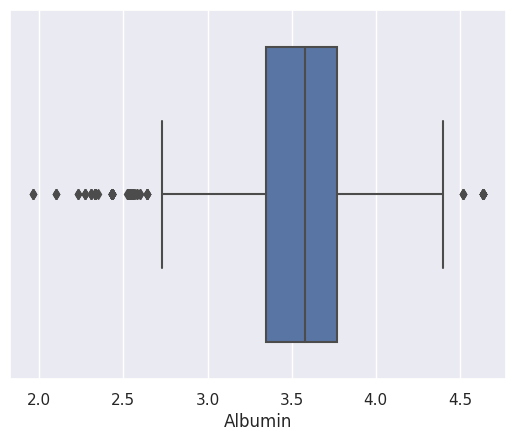

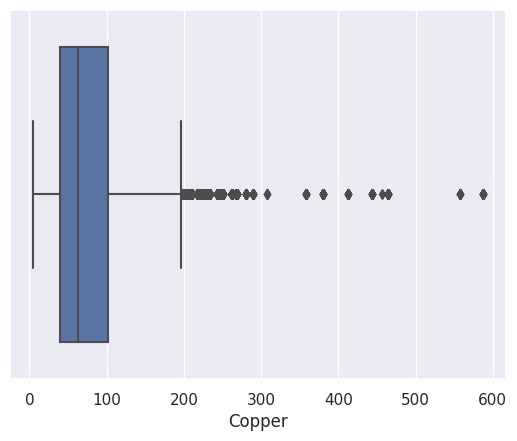

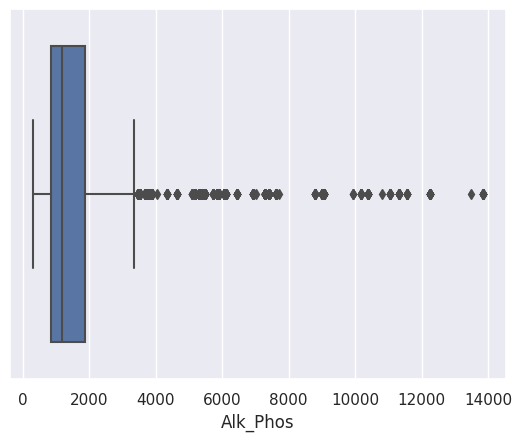

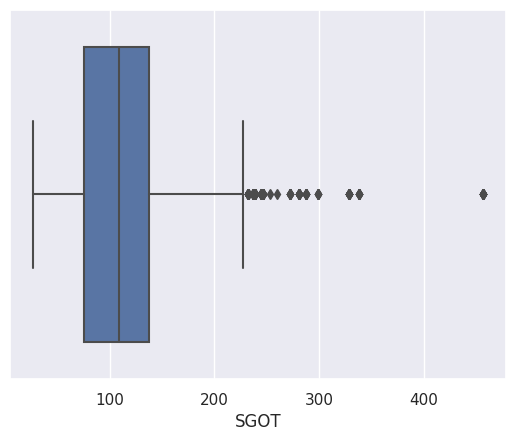

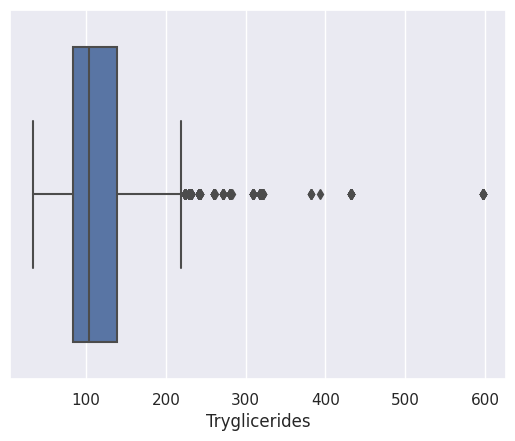

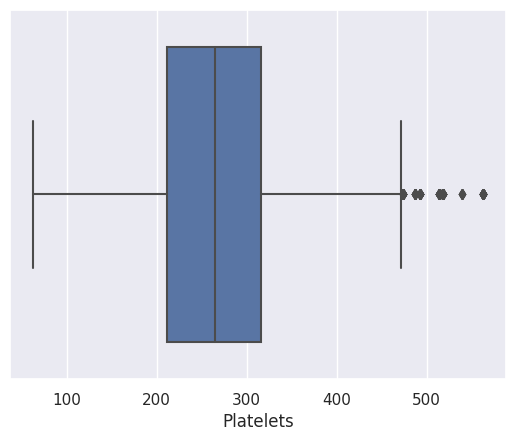

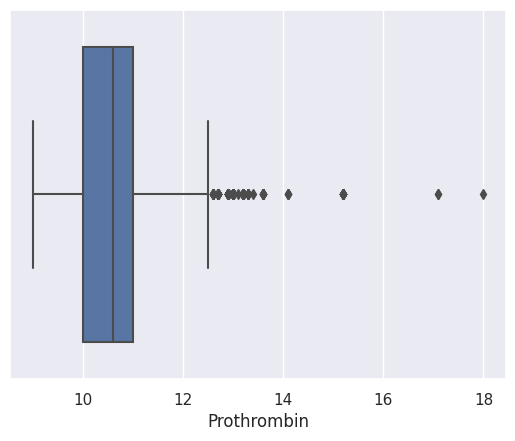

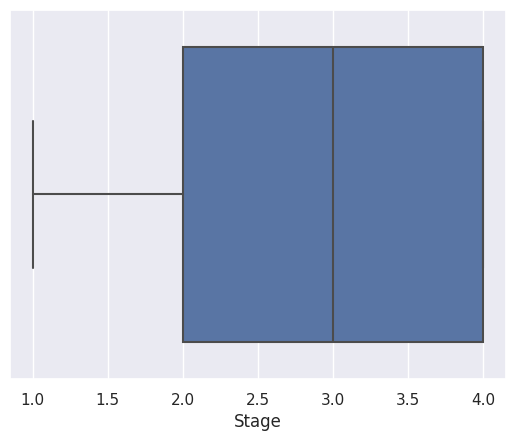

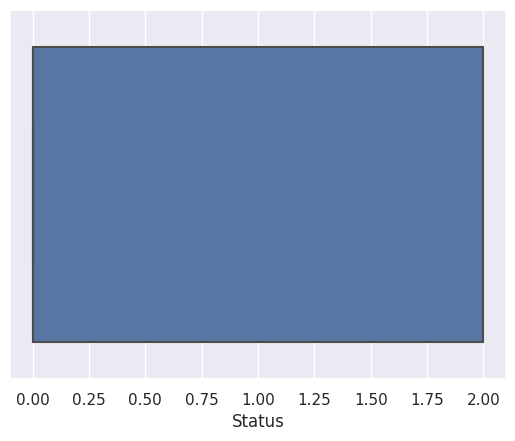

In [26]:
sns.set(font_scale=1)
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [27]:
#There are alot of outliers present but we will not delete the because their correlation with target is very high

In [28]:
import warnings
warnings.filterwarnings('ignore')

N_Days
0.4485746146042711


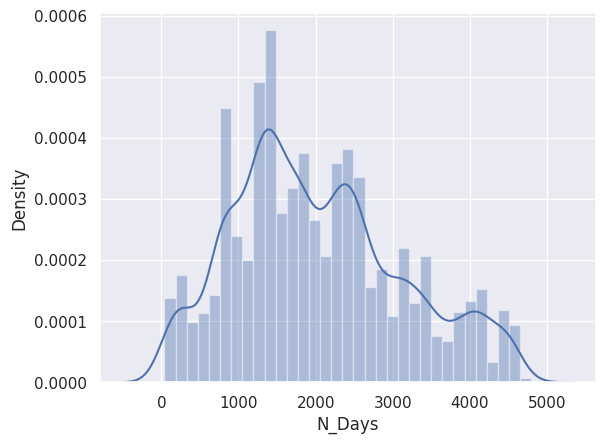

Drug
-0.02909858850571118


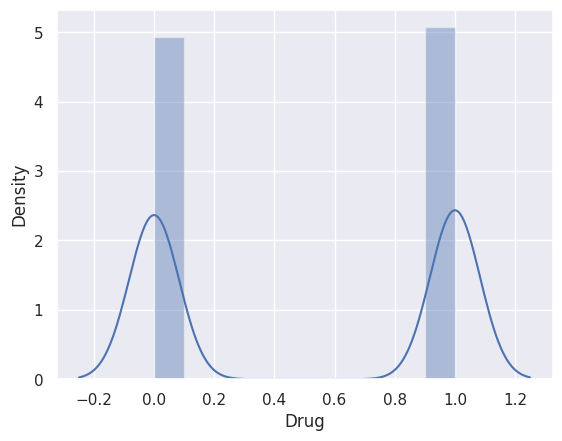

Age
0.08407534023432792


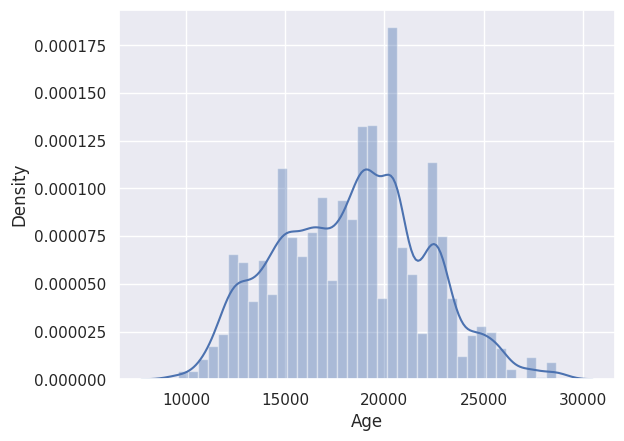

Sex
3.3121529373761582


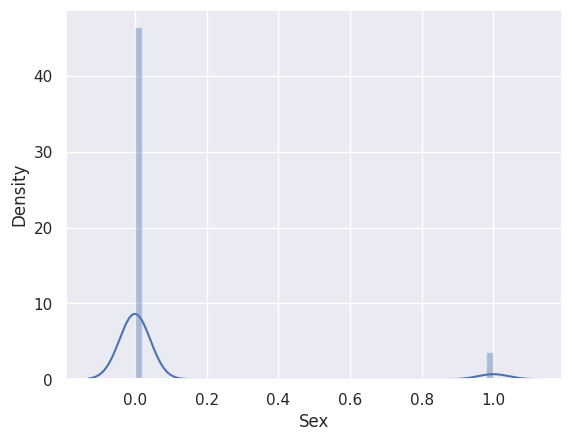

Ascites
4.225296429579562


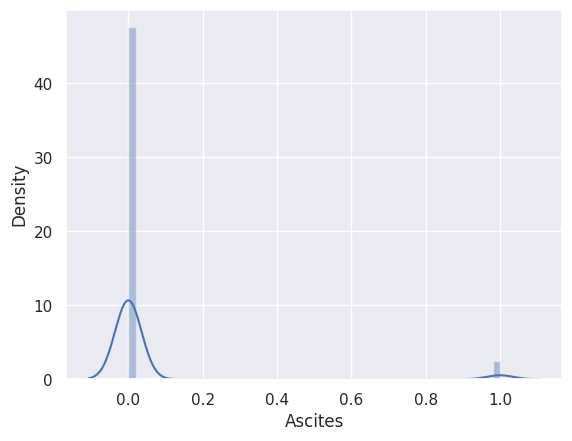

Hepatomegaly
-0.04529940757133396


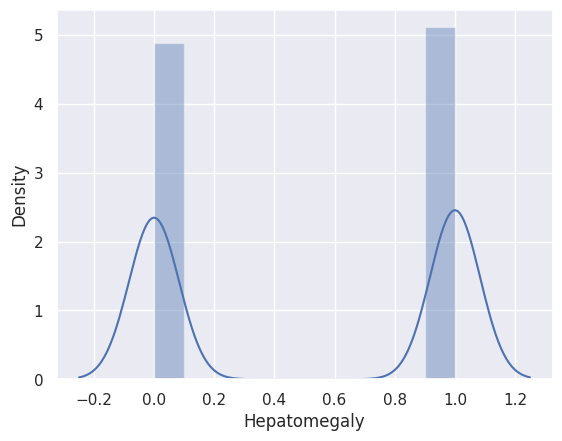

Spiders
1.1839983592506018


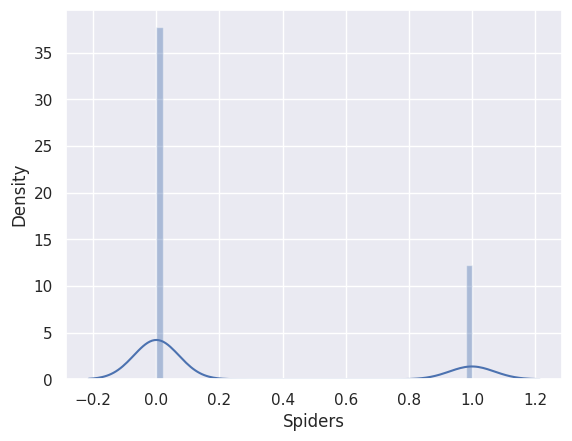

Edema
3.33359819444355


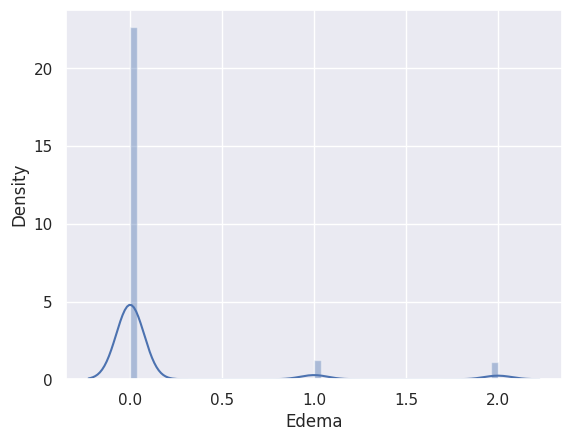

Bilirubin
3.3390615187679904


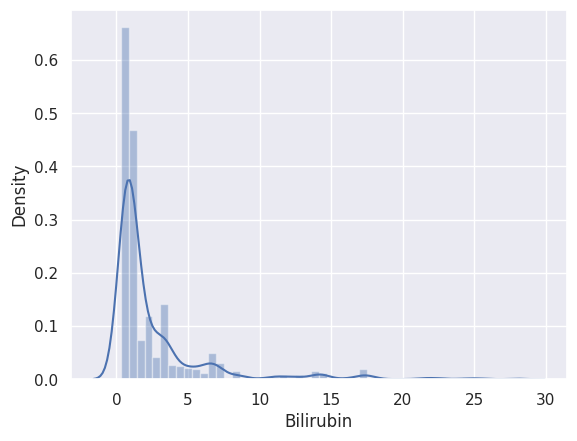

Cholesterol
3.6789592584545185


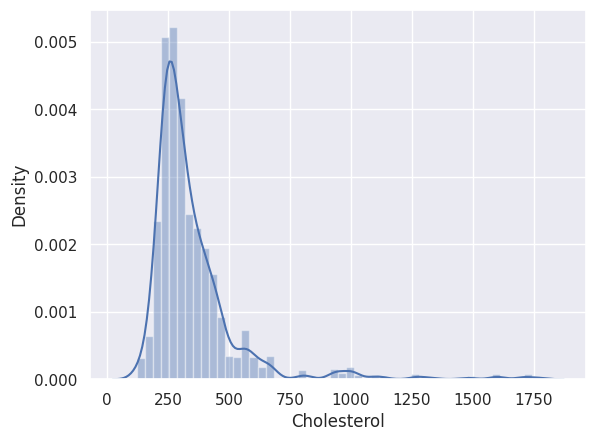

Albumin
-0.5610430164769734


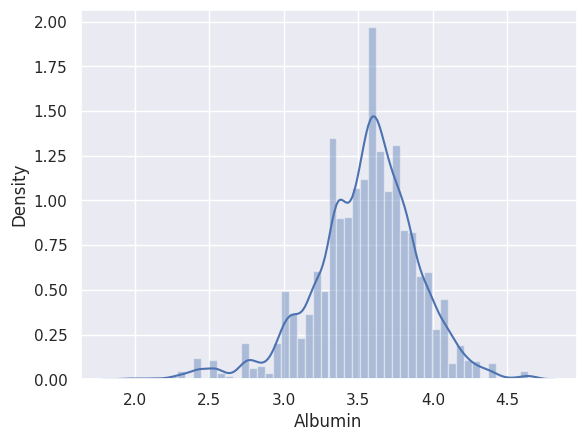

Copper
2.70122313105528


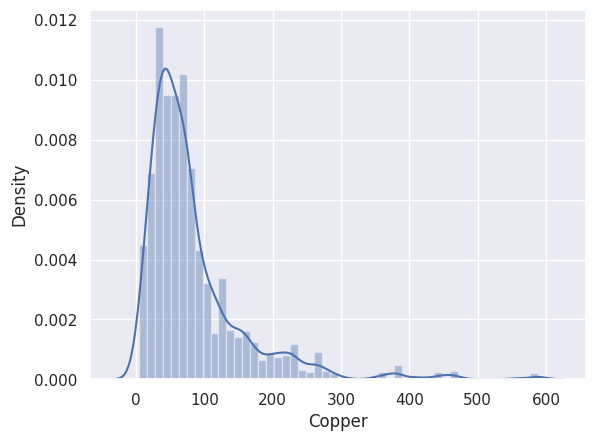

Alk_Phos
3.1949512883272457


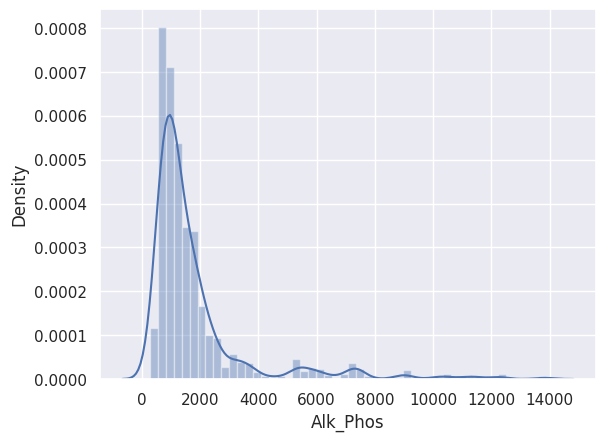

SGOT
1.5345144783481144


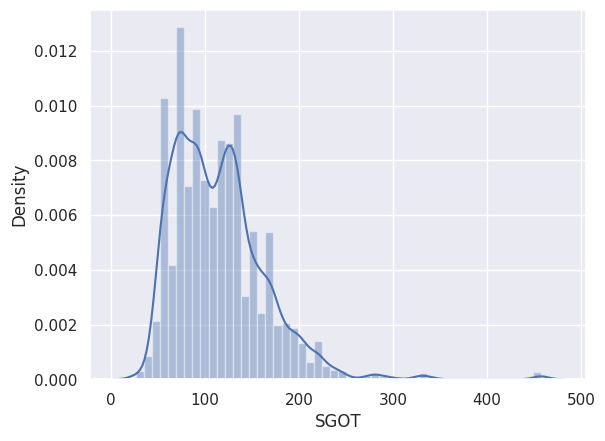

Tryglicerides
2.6334210282739865


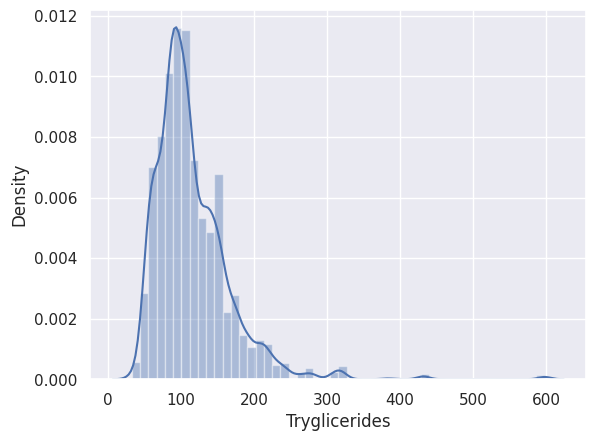

Platelets
0.4199682210364321


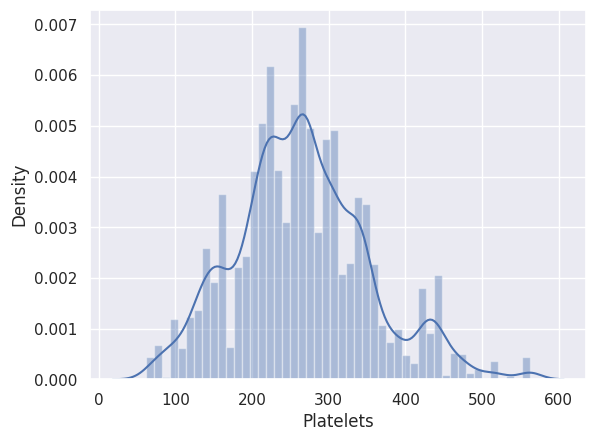

Prothrombin
1.292190771529963


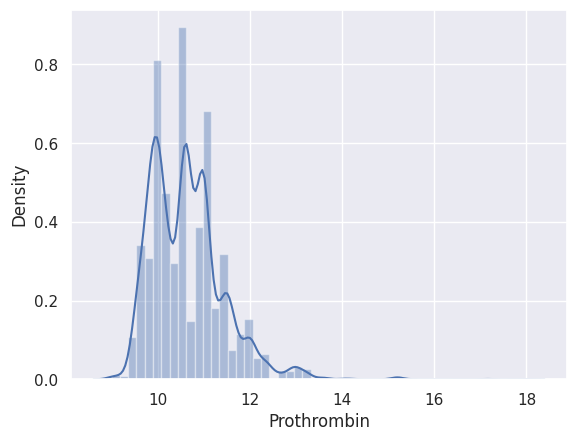

Stage
-0.5258732182675311


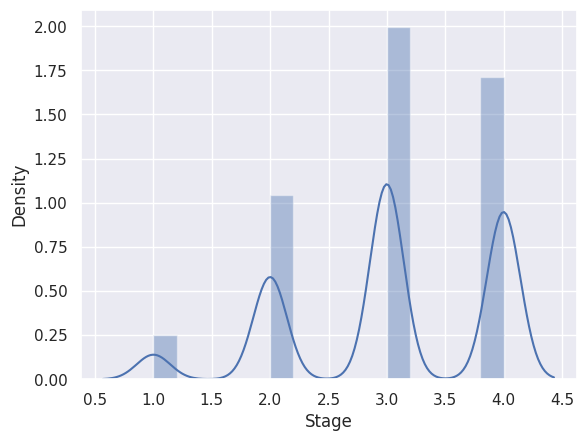

Status
0.6078725454540184


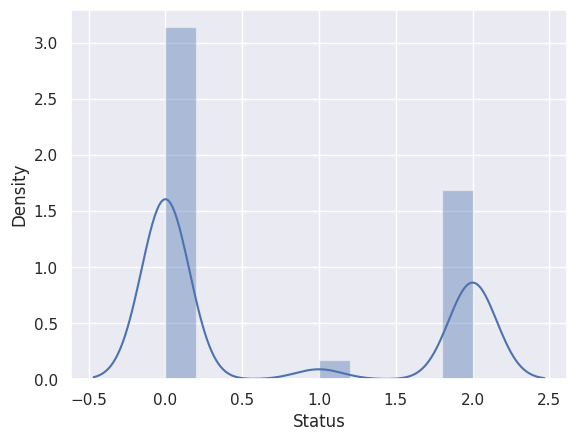

In [29]:
sns.set(font_scale=1)
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [30]:
important_info = df.describe().T
important_info['variance'] = important_info['std']**2
important_info['co-variance'] = important_info['std']/important_info['mean']
important_info['skew'] = df.skew().T
important_info

,count,mean,std,min,25%,50%,75%,max,variance,co-variance,skew
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00,1.197347e+06,0.538985,0.448660
Drug,7905.0,0.507274,0.499979,0.00,0.00,1.00,1.00,1.00,2.499787e-01,0.985619,-0.029104
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00,1.354210e+07,0.200290,0.084091
Sex,7905.0,0.071980,0.258471,0.00,0.00,0.00,0.00,1.00,6.680713e-02,3.590881,3.312782
Ascites,7905.0,0.048071,0.213929,0.00,0.00,0.00,0.00,1.00,4.576582e-02,4.450296,4.226098
Hepatomegaly,7905.0,0.511322,0.499903,0.00,0.00,1.00,1.00,1.00,2.499034e-01,0.977669,-0.045308
Spiders,7905.0,0.245288,0.430285,0.00,0.00,0.00,0.00,1.00,1.851451e-01,1.754204,1.184223
Edema,7905.0,0.137761,0.453977,0.00,0.00,0.00,0.00,2.00,2.060954e-01,3.295400,3.334231
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00,1.453867e+01,1.469641,3.339695
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00,3.817309e+04,0.557332,3.679658


In [41]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


In [49]:
df.shape

(7905, 19)

In [43]:
x=df.drop('Status',axis=1)
y=df.Status

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

<Axes: ylabel='count'>

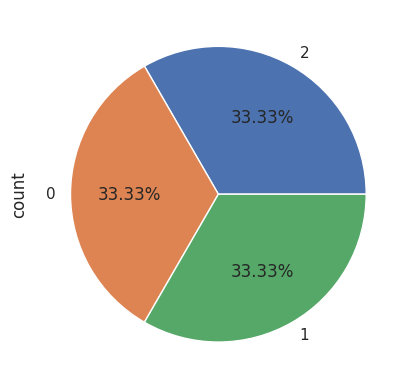

In [51]:
sns.set(font_scale=1)
y1.value_counts().plot.pie(autopct='%.2f%%')

In [58]:
y1.shape

(14895,)

<Axes: ylabel='count'>

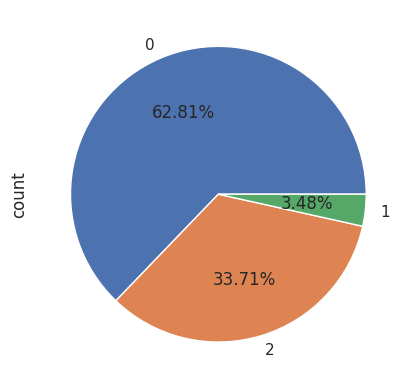

In [52]:
df.Status.value_counts().plot.pie(autopct='%.2f%%')

.

.

.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

In [89]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.8493190101668905
Testint :  0.7816066234056835
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1532
           1       0.74      0.97      0.84      1507
           2       0.82      0.66      0.73      1430

    accuracy                           0.78      4469
   macro avg       0.79      0.78      0.78      4469
weighted avg       0.79      0.78      0.78      4469

[0.77643505 0.77811346 0.78482712 0.80933199 0.81570997]
0.7928835179590467
difference -0.011276894553363115


In [91]:
rfc= RandomForestClassifier(n_estimators=300)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x1,y1,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  0.8946072946968002
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1532
           1       0.94      0.97      0.95      1507
           2       0.87      0.85      0.86      1430

    accuracy                           0.89      4469
   macro avg       0.89      0.89      0.89      4469
weighted avg       0.89      0.89      0.89      4469

[0.83172303 0.88808374 0.89130435 0.89766317 0.88477035 0.89282836
 0.88557615 0.91780822 0.9089444  0.9081386  0.91539081 0.91377921]
0.8946675321574596
difference -6.023746065941804e-05
[[1325   41  166]
 [  24 1462   21]
 [ 166   53 1211]]


rfc_param = {'max_depth':[5,10,15],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16],
            'n_estimators':[200,300,400]}

clf = GridSearchCV(rfc,rfc_param,cv=10)
clf.fit(x_train_sca,y_train)
print(clf.best_score_)
print(clf.best_params_)

In [64]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  0.7749856128908498
Testint :  0.7778026404117252
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1532
           1       0.79      0.78      0.79      1507
           2       0.72      0.72      0.72      1430

    accuracy                           0.78      4469
   macro avg       0.78      0.78      0.78      4469
weighted avg       0.78      0.78      0.78      4469

[0.80139152 0.82352941 0.80771664 0.8058191  0.81593928]
0.8108791903858318
difference -0.033076549974106584


In [70]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  0.848072127373873
Testint :  0.8391138957261133
0.8391138957261133
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1532
           1       0.85      0.90      0.87      1507
           2       0.81      0.76      0.79      1430

    accuracy                           0.84      4469
   macro avg       0.84      0.84      0.84      4469
weighted avg       0.84      0.84      0.84      4469

[0.80771664 0.84440228 0.81593928 0.82542694 0.83175206]
0.8250474383301707
difference 0.014066457395942589


In [71]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  0.9923268751198926
Testint :  0.8558961736406355
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1532
           1       0.90      0.95      0.92      1507
           2       0.83      0.78      0.81      1430

    accuracy                           0.86      4469
   macro avg       0.85      0.85      0.85      4469
weighted avg       0.85      0.86      0.85      4469

[0.79696395 0.80898166 0.79127135 0.79063884 0.80898166]
0.7993674889310564
difference 0.05652868470957917


In [72]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.6828122002685594
Testint :  0.6867308122622511
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1532
           1       0.67      0.68      0.67      1507
           2       0.68      0.64      0.66      1430

    accuracy                           0.69      4469
   macro avg       0.69      0.69      0.69      4469
weighted avg       0.69      0.69      0.69      4469

[0.75458571 0.75648324 0.76280835 0.7602783  0.76407337]
0.7596457938013915
difference -0.07291498153914044


In [83]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(dtcy_pred,y_test))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  0.7950324457373014
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1434
           1       0.89      0.85      0.87      1576
           2       0.75      0.74      0.75      1459

    accuracy                           0.80      4469
   macro avg       0.79      0.79      0.79      4469
weighted avg       0.80      0.80      0.80      4469

[0.71663504 0.74067046 0.72422517 0.72043011 0.72043011]
0.7244781783681216
difference 0.0705542673691798


In [75]:
dtc_param = {'max_depth':[5,10,15],
            'max_features':[5,7,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,10]
            }
clf = GridSearchCV(dtc, dtc_param,cv=15)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.7807395462939992
{'criterion': 'gini', 'max_depth': 15, 'max_features': 7, 'min_samples_split': 4}


In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_sca, y_train)

print('Training  : ',xgb.score(x_train_sca,y_train))
print('Testint : ',xgb.score(x_test_sca,y_test))

Training  :  0.997218492230961
Testint :  0.8968449317520698


In [88]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose = False)
cat.fit(x_train_sca, y_train)
caty_pred = cat.predict(x_test_sca)

print('Training  : ',cat.score(x_train_sca,y_train))
print('Testint : ',cat.score(x_test_sca,y_test))

print(classification_report(y_test,caty_pred))

recheck = cross_val_score(cat,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,caty_pred) - recheck.mean())

Training  :  0.9747746019566469
Testint :  0.8981875139852316
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1532
           1       0.93      0.97      0.95      1507
           2       0.89      0.83      0.86      1430

    accuracy                           0.90      4469
   macro avg       0.90      0.90      0.90      4469
weighted avg       0.90      0.90      0.90      4469

[0.84525008 0.88183954 0.8905673  0.89627392 0.90298758]
0.8833836858006043
difference 0.014803828184627221


# CatBoostClassifier is best performing

.

.

In [117]:
test_data = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

In [118]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [119]:
test_data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [121]:
test_data.duplicated().sum()

0

In [122]:
test_data.nunique()

id               5271
N_Days            409
Drug                2
Age               363
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         108
Cholesterol       222
Albumin           154
Copper            164
Alk_Phos          362
SGOT              195
Tryglicerides     155
Platelets         223
Prothrombin        47
Stage               4
dtype: int64

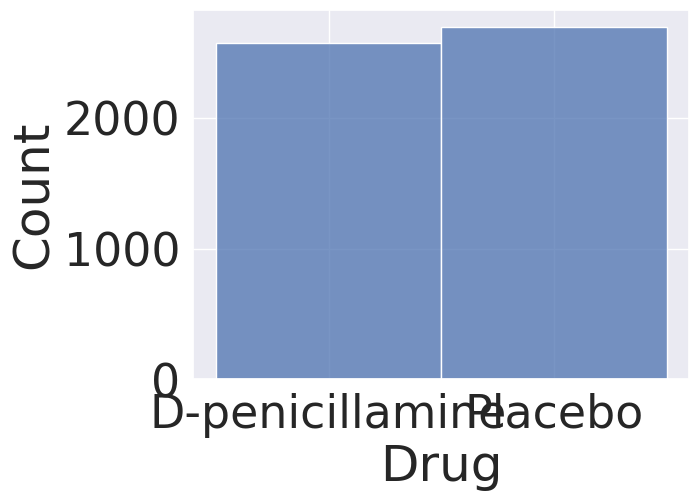

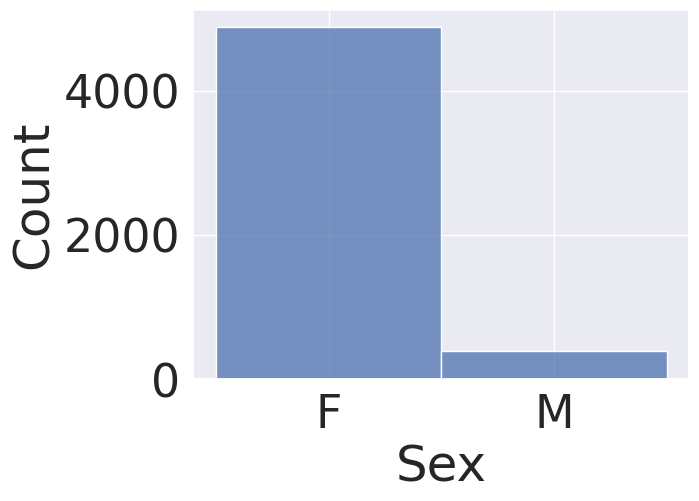

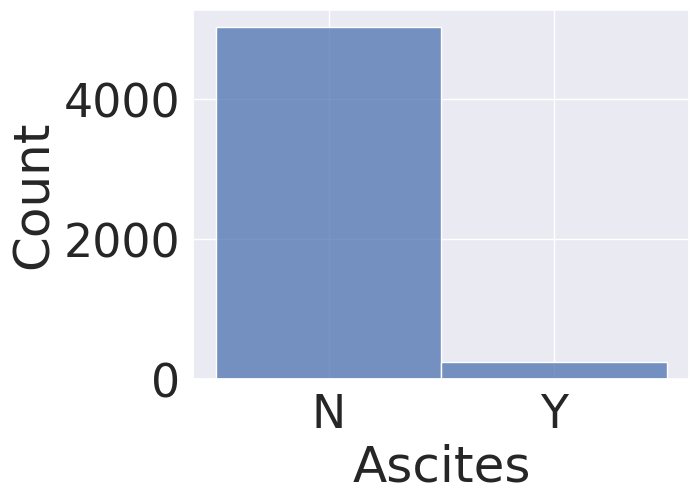

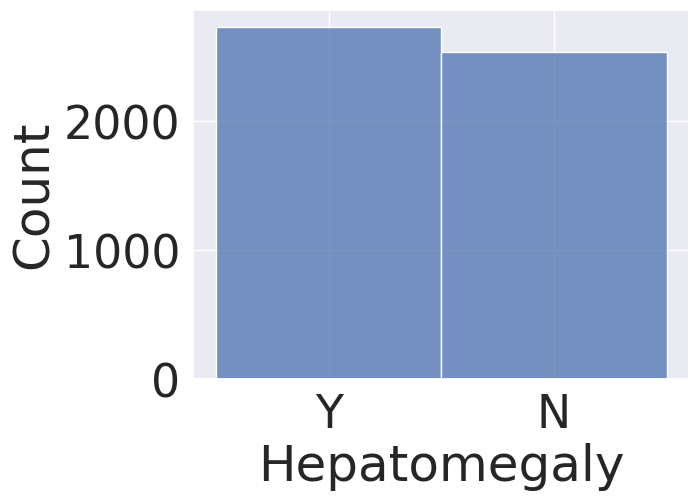

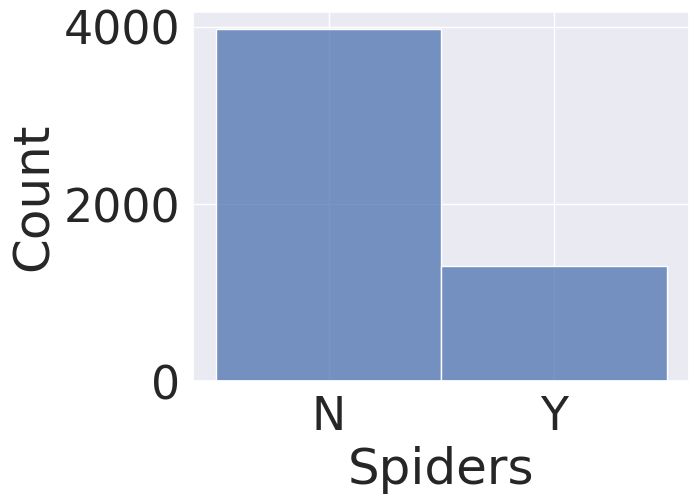

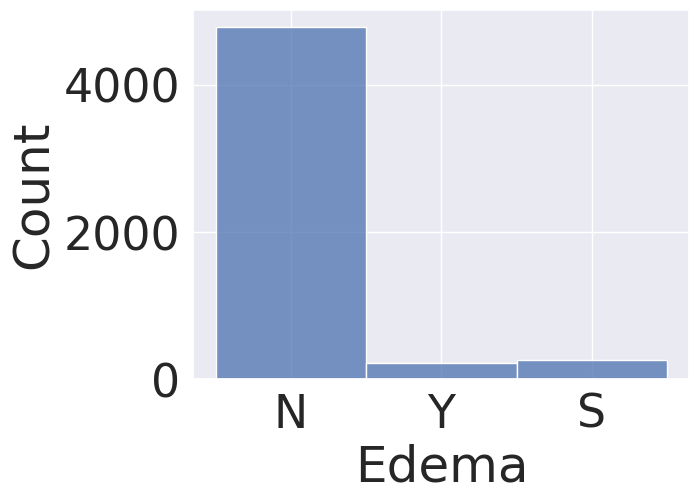

In [123]:
for i in test_data.select_dtypes(include = 'object').columns:
    sns.histplot(data=test_data,x=i)
    plt.show()

In [124]:
categorical_features2 = test_data.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features2)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical_features2:
    test_data[i] = encoder.fit_transform(test_data[i])

Categorical features:  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


<Axes: >

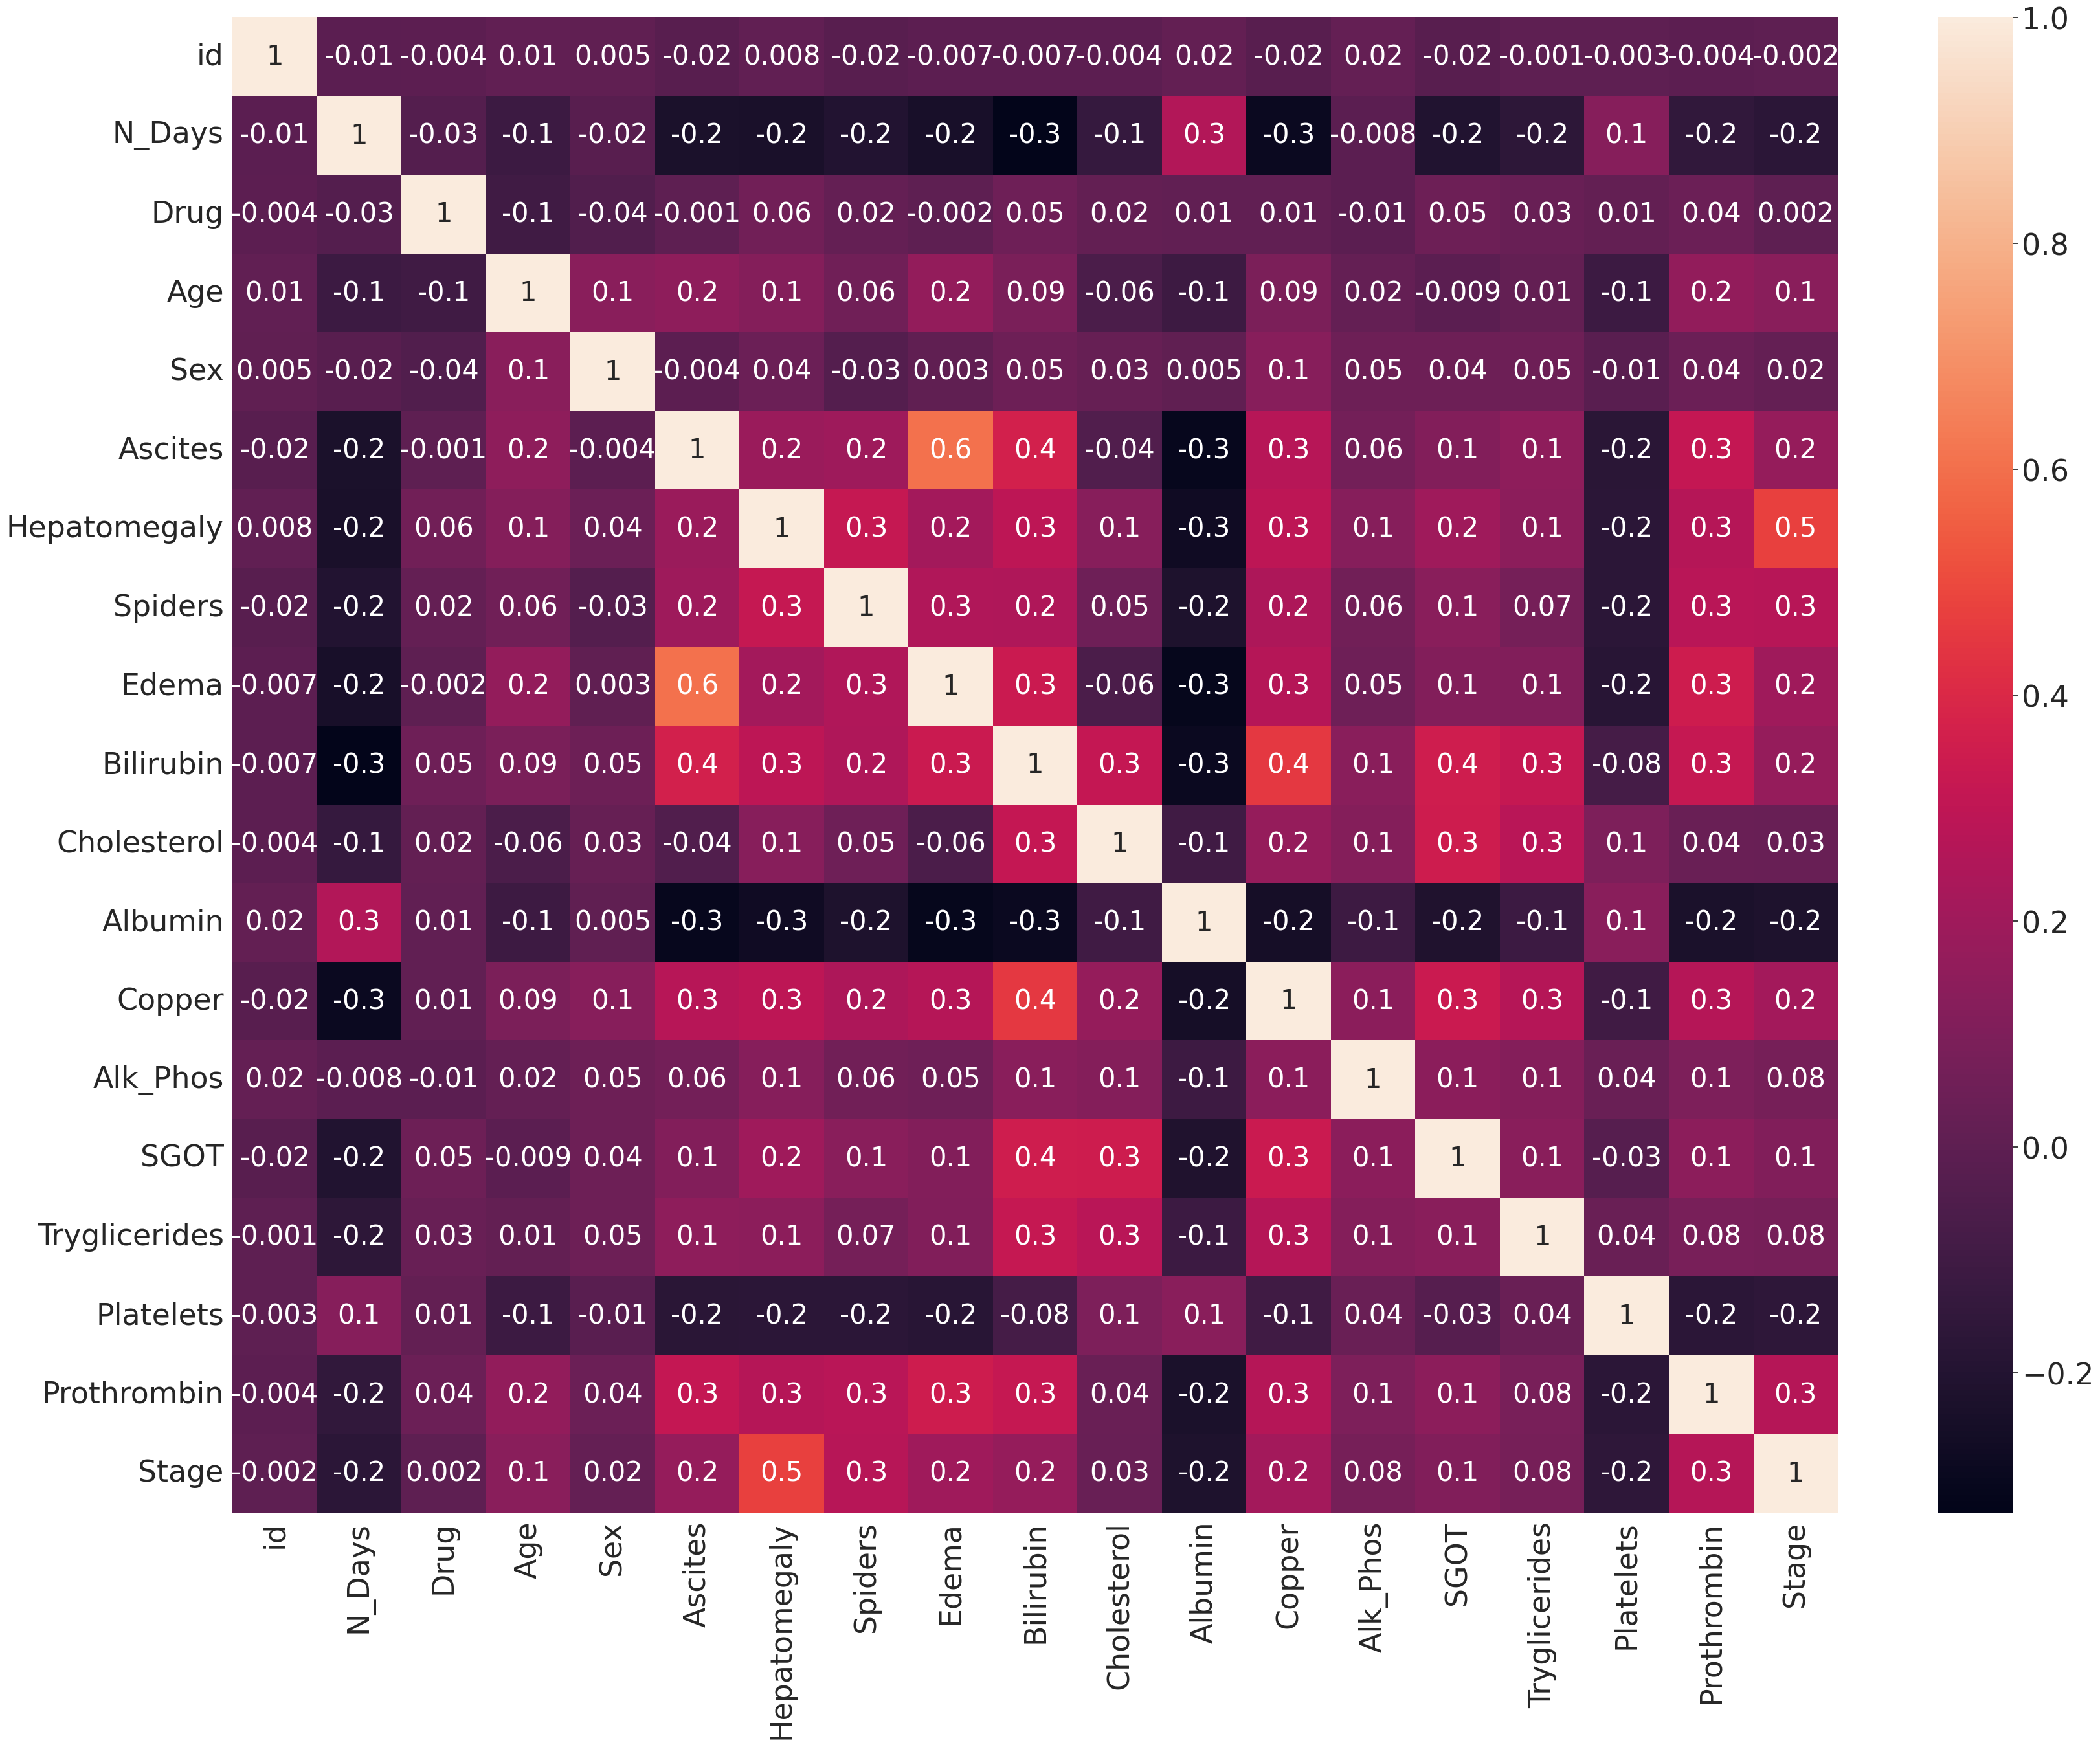

In [125]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
sns.heatmap(test_data.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})

In [126]:
#test_data = test_data.drop('id',axis=1)

In [139]:
final = cat
final.fit(x1,y1)

In [140]:
predicting_test = final.predict(test_data)
predicting_test

array([[2],
       [1],
       [2],
       ...,
       [0],
       [0],
       [2]])

In [141]:
test = pd.DataFrame(predicting_test)
test

,0
0,2
1,1
2,2
3,0
4,0
...,...
5266,0
5267,0
5268,0
5269,0


# 0 = C
# 1 = CL
# 2 = D

In [142]:
predicting_test

array([[2],
       [1],
       [2],
       ...,
       [0],
       [0],
       [2]])

In [137]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
sample

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128
...,...,...,...,...
5266,13171,0.628084,0.034788,0.337128
5267,13172,0.628084,0.034788,0.337128
5268,13173,0.628084,0.034788,0.337128
5269,13174,0.628084,0.034788,0.337128


In [133]:
ids = test_data['id']

In [146]:
filename = 'Cirrhosis_Outcomes.csv'
submission.to_csv(filename, index = False)
print('Saved file: ' + filename)

Saved file: Cirrhosis_Outcomes.csv
